In [1]:
import tensorflow as tf
from tensorflow.data import Dataset
import os
import cv2
import matplotlib.pyplot as plt

### Create Datasets

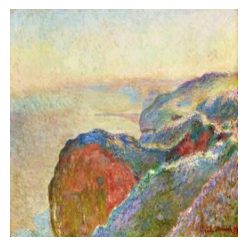

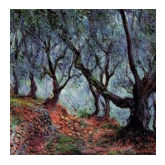

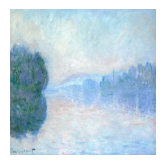

In [3]:
class MonetDataset:
    def __init__(self, root_path):
        self.root_path = root_path
        self.monet_paths = os.listdir(f"{root_path}/monet_jpg")
    
    def __len__(self):
        return len(self.monet_paths)
    
    def __getitem__(self, idx):
        path_monet = os.path.join(self.root_path, 'monet_jpg', self.monet_paths[idx])
        return self.read_img(path_monet)
        
    def read_img(self, path):
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (256, 256))
        image = (image / 127.5) - 1  # Normalize to [-1, 1]
        return image

    def _generator(self):
        for idx in range(len(self)):
            yield self.__getitem__(idx)
    
    @property
    def element_spec(self):
        return tf.TensorSpec(shape=(256, 256, 3), dtype=tf.float32)

# Використання
root_path = './data'
monet_dataset = MonetDataset(root_path)

monet_dataset = tf.data.Dataset.from_generator(
    monet_dataset._generator,
    output_signature=monet_dataset.element_spec
)
num_images = 3
plt.figure(figsize=(10, 10))
for i, image in enumerate(monet_dataset.take(num_images)):
    image = (image.numpy() + 1) / 2  # Перетворення діапазону зображення назад в [0, 1] для відображення
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.show()


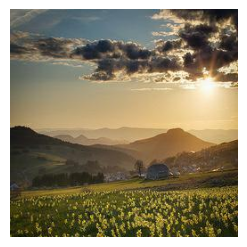

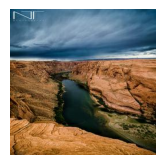

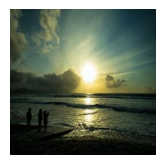

In [4]:
class RealDataset:
    def __init__(self, root_path):
        self.root_path = root_path
        self.monet_paths = os.listdir(f"{root_path}/photo_jpg")
    
    def __len__(self):
        return len(self.monet_paths)
    
    def __getitem__(self, idx):
        path_monet = os.path.join(self.root_path, 'photo_jpg', self.monet_paths[idx])
        return self.read_img(path_monet)
        
    def read_img(self, path):
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (256, 256))
        image = (image / 127.5) - 1  # Normalize to [-1, 1]
        return image

    def _generator(self):
        for idx in range(len(self)):
            yield self.__getitem__(idx)
    
    @property
    def element_spec(self):
        return tf.TensorSpec(shape=(256, 256, 3), dtype=tf.float32)

# Використання
root_path = './data'
real_dataset = RealDataset(root_path)

real_dataset = tf.data.Dataset.from_generator(
    real_dataset._generator,
    output_signature=real_dataset.element_spec
)
num_images = 3
plt.figure(figsize=(10, 10))
for i, image in enumerate(real_dataset.take(num_images)):
    image = (image.numpy() + 1) / 2  # Перетворення діапазону зображення назад в [0, 1] для відображення
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.show()